<a href="https://colab.research.google.com/github/nchebet09/Restaurant-Recommender-System/blob/master/Final_Univariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cleaned_train = pd.read_csv('/content/drive/My Drive/Akeed Datasets/cleaned_train.csv')

In [ ]:
# Pickling cleaned_train
# import pickle  #importing the library
# pickle_out = open ("df.pickle", "wb")  #opening a file to write bytes
# pickle.dump(cleaned_train, pickle_out)  # use pickle.dump to put the df into the opened file
# pickle_out.close()  #then close the picked file

In [ ]:
# unpickling cleaned_train
# pickle_in = open("df.pickle","rb")  #opening the pickle file
# cleaned_train = pickle.load(pickle_in)  #using pickle load to load the df

In [ ]:
cleaned_train.shape

(5801800, 30)

In [ ]:
cleaned_train.head(2)

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,city_id,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,c_diff,u_diff
0,TCHWPBT,0,1,1,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,1.0,3,TCHWPBT X 0 X 4,0,12,10210.781498,-9 days +19:25:41,789 days 19:56:20
1,TCHWPBT,0,1,1,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,1.0,3,TCHWPBT X 0 X 13,0,14,10223.800918,84 days 17:15:43,788 days 01:29:40


Before we begin EDA, let's do final cleaning steps on our dataset

In [ ]:
# Roughly, let's check on the statistical summary of the entire dataset before isolating the numerical columns. 
# This will allow us to recognize the presence of any anomaly in the dataset
round(cleaned_train.describe(),2)

,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,city_id,device_type,target,duration,haversine_dist
count,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.00,5801800.0,5801800.00,5801800.00,5801800.00,5801800.00
mean,0.64,1.00,0.97,0.75,2.36,-25.15,288.84,120050.76,1.88,0.80,2.11,0.41,11.75,0.85,14.03,1.10,0.85,0.88,9.90,4.35,1.0,2.98,0.01,11.26,3316.69
std,0.90,0.03,0.17,1.33,22.76,36.95,241.09,3491.48,20.49,4.38,0.31,0.34,4.09,0.36,4.30,6.27,0.36,0.32,3.13,0.25,0.0,0.20,0.12,5.63,4365.36
min,0.00,0.00,0.00,0.00,-1038.00,-134.40,4.00,118597.00,-1.79,-1.45,2.00,0.00,2.00,0.00,5.00,0.00,0.00,0.00,1.00,3.20,1.0,1.00,0.00,-22.00,0.00
25%,0.00,1.00,1.00,0.00,-0.50,-78.50,105.75,118702.75,-0.81,0.08,2.00,0.00,8.00,1.00,10.00,0.00,1.00,1.00,11.00,4.20,1.0,3.00,0.00,11.00,76.66
50%,0.00,1.00,1.00,0.00,-0.09,0.02,202.00,118801.00,-0.49,0.53,2.00,0.70,15.00,1.00,15.00,0.00,1.00,1.00,11.00,4.40,1.0,3.00,0.00,12.00,153.48
75%,2.00,1.00,1.00,1.00,0.26,0.51,387.25,118990.25,0.02,0.64,2.00,0.70,15.00,1.00,15.00,0.00,1.00,1.00,11.00,4.50,1.0,3.00,0.00,14.00,8748.97
max,2.00,1.00,1.00,29.00,453.80,45.34,907.00,132953.00,205.20,44.22,3.00,0.70,15.00,1.00,45.00,50.00,1.00,1.00,11.00,4.80,1.0,3.00,1.00,17.00,16764.80


All the numerical variables look okay except for the duration column which has negative minimum value. It is unusual to have negative duration time, we will further investigate this column below.

In [ ]:
print(cleaned_train[cleaned_train['duration'] < 0].shape) #checking the shape of records with negative duration
cleaned_train[cleaned_train['duration'] < 0].head(2) #checking the first two records

(174054, 30)


,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,city_id,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,c_diff,u_diff
14,TCHWPBT,0,1,1,0,-96.44,-67.2,79,118676.0,0.63500,0.5273,Restaurants,2.0,0.0,15.0,1.0,15,0.0,1.0,1,11,4.7,1.0,3,TCHWPBT X 0 X 79,0,-9,10348.705802,200 days 03:19:42,789 days 22:30:19
49,TCHWPBT,0,1,1,0,-96.44,-67.2,201,118800.0,0.01563,0.5317,Restaurants,2.0,0.7,15.0,1.0,12,0.0,1.0,1,11,4.0,1.0,3,TCHWPBT X 0 X 201,0,-14,10280.156932,399 days 20:27:15,784 days 23:11:00


The total number of records with negative duration = 174,054. We will delete these records, since it doesn't make sense to have negative duration time. 

In [ ]:
# dropping records with duration less than zero
cleaned_train.drop(cleaned_train[cleaned_train['duration'] < 0].index, inplace = True)
cleaned_train[cleaned_train['duration'] < 0].shape #confirming that the records with negative duration have been deleted

(0, 30)

All the record with negative duration have been deleted.

In [ ]:
cleaned_train.head(1)

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,city_id,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,c_diff,u_diff
0,TCHWPBT,0,1,1,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,1.0,3,TCHWPBT X 0 X 4,0,12,10210.781498,-9 days +19:25:41,789 days 19:56:20


In [ ]:
# Based on the variable definition document provided, status and verified, both, indicate the account status. 
# As a result, we will keep only the verified columns for both customer and vendor and drop status columns.
cleaned_train = cleaned_train.drop(['status_x', 'status_y'], axis = 1)
cleaned_train.head()

,akeed_customer_id,gender,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,verified_y,rank,vendor_rating,city_id,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,c_diff,u_diff
0,TCHWPBT,0,1,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1,11,4.4,1.0,3,TCHWPBT X 0 X 4,0,12,10210.781498,-9 days +19:25:41,789 days 19:56:20
1,TCHWPBT,0,1,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1,11,4.7,1.0,3,TCHWPBT X 0 X 13,0,14,10223.800918,84 days 17:15:43,788 days 01:29:40
2,TCHWPBT,0,1,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1,1,4.5,1.0,3,TCHWPBT X 0 X 20,0,14,10232.068678,86 days 03:11:59,789 days 21:19:32
3,TCHWPBT,0,1,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1,11,4.5,1.0,3,TCHWPBT X 0 X 23,0,12,10211.117900,88 days 00:04:25,784 days 05:39:54
4,TCHWPBT,0,1,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1,11,4.4,1.0,3,TCHWPBT X 0 X 28,0,12,10331.347778,99 days 02:56:15,787 days 20:41:18


In [ ]:
# renaming prepration column correctly, verified x and y, duration

cleaned_train = cleaned_train.rename(columns = {"prepration_time": "preparation_time", "verified_x": "customer_acc_verified",
                                "verified_y": "vendor_acc_verified", "duration": "vendor_duration_open" })

In [ ]:
# checking data type to help select the numerical columns below
cleaned_train.dtypes

akeed_customer_id          object
gender                      int64
customer_acc_verified       int64
location_number             int64
latitude_customer         float64
longitude_customer        float64
id                          int64
authentication_id         float64
latitude_vendor           float64
longitude_vendor          float64
vendor_category_en         object
vendor_category_id        float64
delivery_charge           float64
serving_distance          float64
is_open                   float64
preparation_time            int64
discount_percentage       float64
vendor_acc_verified         int64
rank                        int64
vendor_rating             float64
city_id                   float64
device_type                 int64
CID X LOC_NUM X VENDOR     object
target                      int64
vendor_duration_open        int64
haversine_dist            float64
c_diff                     object
u_diff                     object
dtype: object

In [ ]:
# get numeric columns
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_train = cleaned_train.select_dtypes(include=numerics)
numeric_train.shape

(5627746, 23)

In [ ]:
numeric_train.head(1)

,gender,customer_acc_verified,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_id,delivery_charge,serving_distance,is_open,preparation_time,discount_percentage,vendor_acc_verified,rank,vendor_rating,city_id,device_type,target,vendor_duration_open,haversine_dist
0,0,1,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,2.0,0.0,6.0,1.0,15,0.0,1,11,4.4,1.0,3,0,12,10210.781498


In [ ]:
# exclude categorical columns that were earlier encoded
numeric_actual = numeric_train.iloc[:,[3,4,7,8,10,11,13,14,17,21,22]]
numeric_actual.head(1)

,latitude_customer,longitude_customer,latitude_vendor,longitude_vendor,delivery_charge,serving_distance,preparation_time,discount_percentage,vendor_rating,vendor_duration_open,haversine_dist
0,-96.44,-67.2,-0.5884,0.7544,0.0,6.0,15,0.0,4.4,12,10210.781498


In [ ]:
numeric_actual.shape

(5627746, 11)

## EDA

### Univariate Analysis

#### Statistical Summary of Numerical Variables

In [ ]:
#statistical summary of numerical variables

round(numeric_actual.describe(),2)

,latitude_customer,longitude_customer,latitude_vendor,longitude_vendor,delivery_charge,serving_distance,preparation_time,discount_percentage,vendor_rating,vendor_duration_open,haversine_dist
count,5627746.00,5627746.00,5627746.00,5627746.00,5627746.00,5627746.00,5627746.00,5627746.00,5627746.00,5627746.00,5627746.00
mean,2.36,-25.15,1.90,0.81,0.41,11.65,14.07,1.13,4.35,12.07,3318.69
std,22.76,36.95,20.81,4.44,0.34,4.11,4.34,6.36,0.25,3.13,4368.04
min,-1038.00,-134.40,-1.79,-1.45,0.00,2.00,5.00,0.00,3.20,0.00,0.00
25%,-0.50,-78.50,-0.82,0.08,0.00,8.00,10.00,0.00,4.20,11.00,76.41
50%,-0.09,0.02,-0.50,0.51,0.70,15.00,15.00,0.00,4.40,13.00,150.99
75%,0.26,0.51,0.00,0.64,0.70,15.00,15.00,0.00,4.50,14.00,8748.20
max,453.80,45.34,205.20,44.22,0.70,15.00,45.00,50.00,4.80,17.00,16764.80



On average, the delivery charge was 0.41 with the max at 0.70.

On average the service distance was 11.65, the minimum being 2 and maximum 15.

The mean preparation time was 14.07 minutes with the max prep time = 45 minutes.

Mean percent discount was really low at 1.13%, but the maximum was as high as 50%. 25%, 50% and 75% are all zeros. With the highest discount at 50% and no values between 25 and 75% it indicates presence of outliers.

The average vendor rating was 4.35, with minimum vendor rating of 3.20 and max vendor rating of 4.80.

On average the vendors opened restaurant for 12.07 hours per day. The longest opened hours was 17.00 hours a day.


In [ ]:
numeric_actual.columns

Index(['latitude_customer', 'longitude_customer', 'latitude_vendor',
       'longitude_vendor', 'delivery_charge', 'serving_distance',
       'preparation_time', 'discount_percentage', 'vendor_rating',
       'vendor_duration_open', 'haversine_dist'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

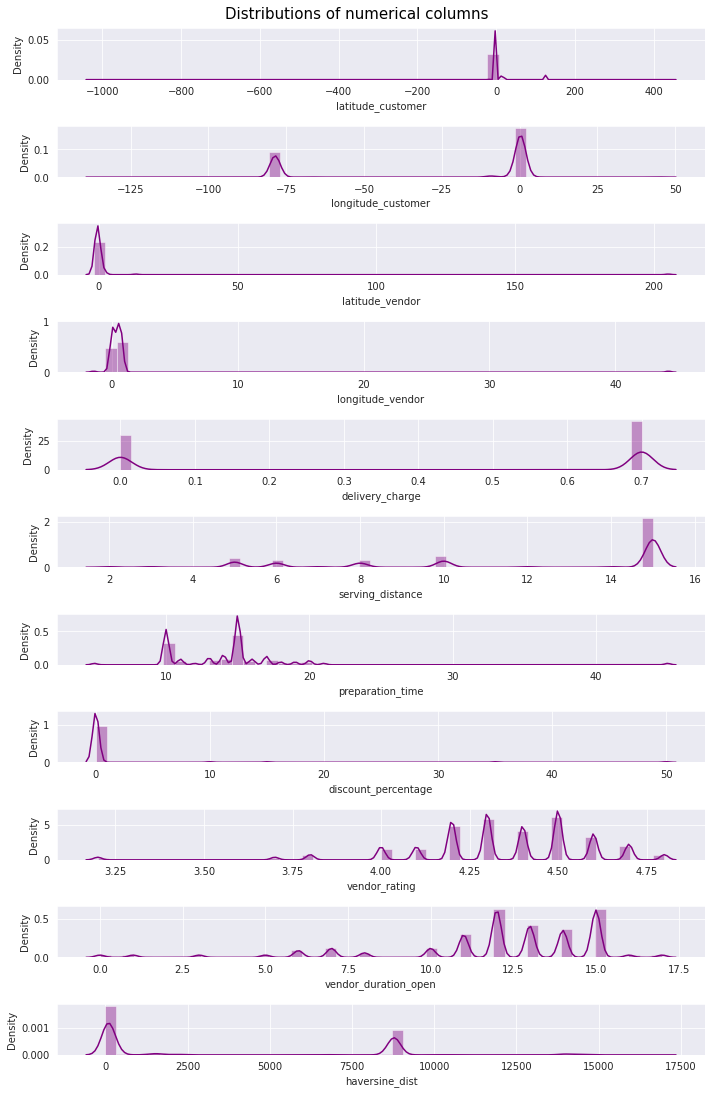

In [ ]:
dist_columns = ['latitude_customer', 'longitude_customer', 'latitude_vendor',
       'longitude_vendor', 'delivery_charge', 'serving_distance',
       'preparation_time', 'discount_percentage', 'vendor_rating',
       'vendor_duration_open', 'haversine_dist']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(dist_columns), figsize = (10, 15))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), numeric_train, dist_columns):
  sns.distplot(numeric_actual[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

Delivery charge showed a bimodal distribution with 0.7 delivery charge having a larger density. This indicates that 0.7 delivery charge was common compared to 0.0.

Service distance showed a multi-modal distribution, with the biggest density at around 15. 

As for discount percentage majority of the values were concentrated at zero, but there were a few values at 10, 15, 35 and 50 percent. Another evidence for outliers.


We see a multi-modal distribution for vendor ratings, with the least rating at around 3.25 and the highest at more than 4.75.

Vendor duration open showed a multimodal distribution with majority of the vendors shown to be open for around 12 and 15 hours per day.

#### Bar Charts to Show the distribution of categorical Variables

Target Variable

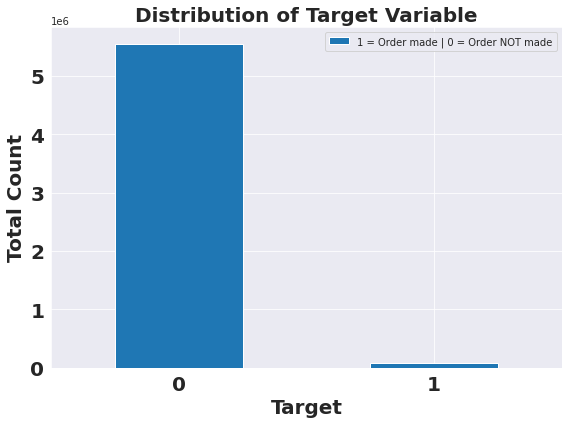

In [ ]:
plt.subplots(figsize=(8,6))
cleaned_train['target'].value_counts().plot.bar()
plt.xlabel('Target',fontsize=20, fontweight='bold')
plt.ylabel('Total Count',fontsize=20, fontweight='bold')
plt.title('Distribution of Target Variable',fontsize=20, fontweight='bold')
plt.xticks(fontsize = 20, rotation=0, fontweight='bold')
plt.yticks(fontsize = 20, fontweight='bold')
plt.legend(["1 = Order made | 0 = Order NOT made"], loc ="best") 
plt.tight_layout()

The plot shows our data is highly imbalanced with majority of the customers not making any food orders.


Device Type

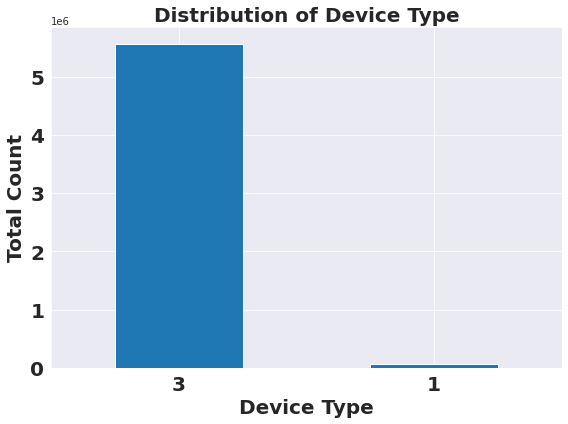

In [ ]:
plt.subplots(figsize=(8,6))
cleaned_train['device_type'].value_counts().plot.bar()
plt.xlabel('Device Type',fontsize=20, fontweight='bold')
plt.ylabel('Total Count',fontsize=20, fontweight='bold')
plt.title('Distribution of Device Type',fontsize=20, fontweight='bold')
plt.xticks(fontsize = 20, rotation=0, fontweight='bold')
plt.yticks(fontsize = 20, fontweight='bold') 
plt.tight_layout()

We see that Device 3 was the most popularly used to take orders by vendors.

Gender

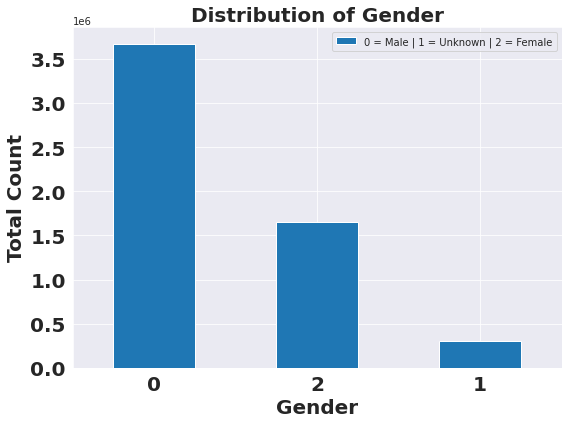

In [ ]:
plt.subplots(figsize=(8,6))
cleaned_train['gender'].value_counts().plot.bar()
plt.xlabel('Gender',fontsize=20, fontweight='bold')
plt.ylabel('Total Count',fontsize=20, fontweight='bold')
plt.title('Distribution of Gender',fontsize=20, fontweight='bold')
plt.xticks(fontsize = 20, rotation=0, fontweight='bold')
plt.yticks(fontsize = 20, fontweight='bold')
plt.legend(["0 = Male | 1 = Unknown | 2 = Female" ], loc ="best") 

plt.tight_layout()

Majority of the customers registered as males, females were very few compared to males. But we also we had a huge unknown gender type, we suspect that some of these unknown entries could be females.

Location Number

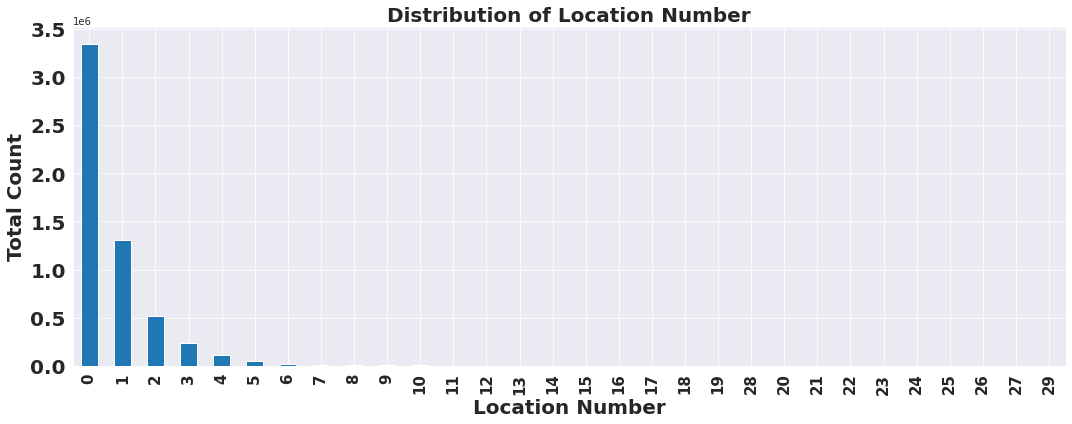

In [ ]:
plt.subplots(figsize=(15,6))
cleaned_train['location_number'].value_counts().plot.bar()
plt.xlabel('Location Number',fontsize=20, fontweight='bold')
plt.ylabel('Total Count',fontsize=20, fontweight='bold')
plt.title('Distribution of Location Number',fontsize=20, fontweight='bold')
plt.xticks(fontsize = 15, rotation=90, fontweight='bold')
plt.yticks(fontsize = 20, fontweight='bold') 
plt.tight_layout()

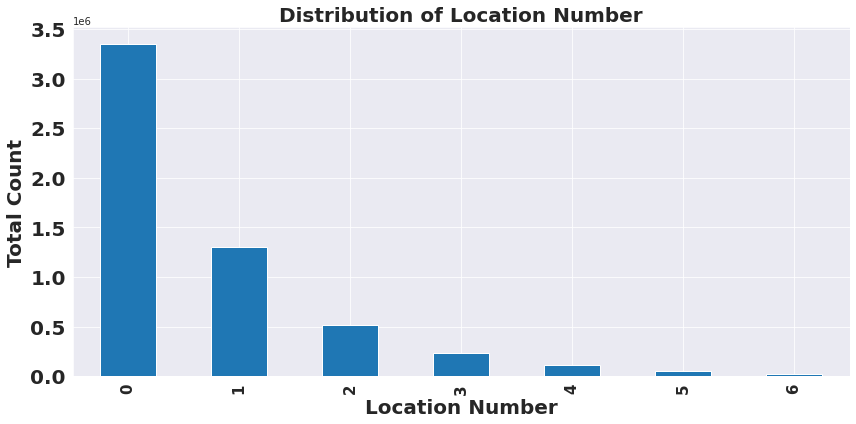

In [ ]:
plt.subplots(figsize=(12,6))
cleaned_train['location_number'].value_counts().head(7).plot.bar()
plt.xlabel('Location Number',fontsize=20, fontweight='bold')
plt.ylabel('Total Count',fontsize=20, fontweight='bold')
plt.title('Distribution of Location Number',fontsize=20, fontweight='bold')
plt.xticks(fontsize = 15, rotation=90, fontweight='bold')
plt.yticks(fontsize = 20, fontweight='bold') 
plt.tight_layout()

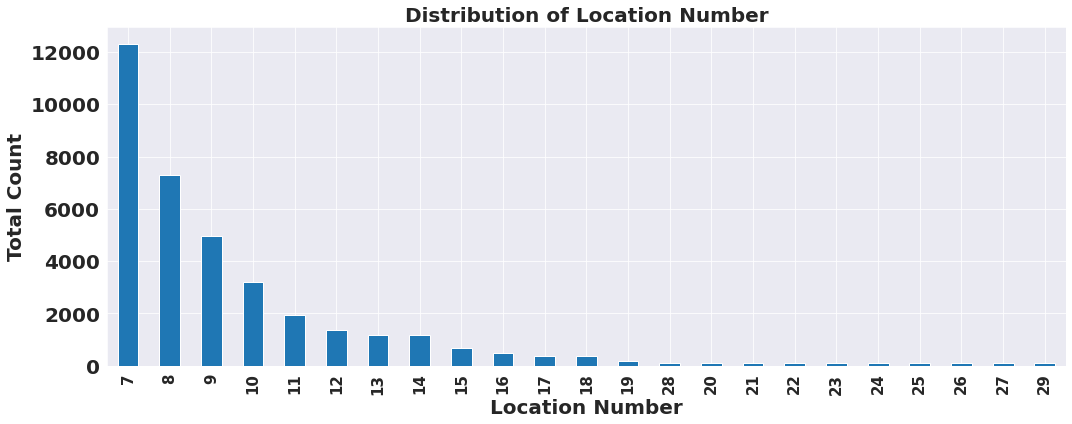

In [ ]:
plt.subplots(figsize=(15,6))
cleaned_train['location_number'].value_counts().tail(23).plot.bar()
plt.xlabel('Location Number',fontsize=20, fontweight='bold')
plt.ylabel('Total Count',fontsize=20, fontweight='bold')
plt.title('Distribution of Location Number',fontsize=20, fontweight='bold')
plt.xticks(fontsize = 15, rotation=90, fontweight='bold')
plt.yticks(fontsize = 20, fontweight='bold') 
plt.tight_layout()

Majority of the customers indicated unknown location (location number 0)followed by location number 1, 2, 3, 4, 5,6. Location numbers 7 to 29 were very few compared to 0 through 6. 

Customer Account Verification

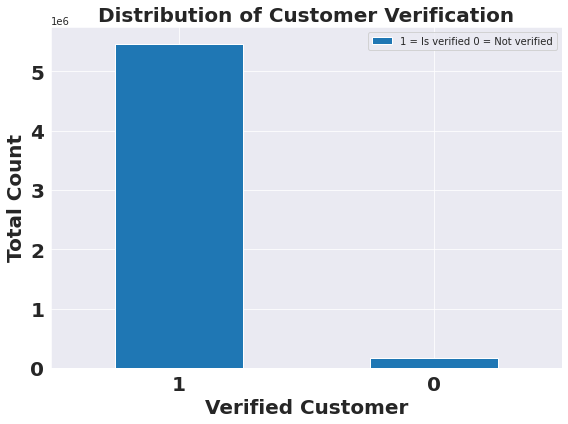

In [ ]:
plt.subplots(figsize=(8,6))
cleaned_train['customer_acc_verified'].value_counts().plot.bar()
plt.xlabel('Verified Customer',fontsize=20, fontweight='bold')
plt.ylabel('Total Count',fontsize=20, fontweight='bold')
plt.title('Distribution of Customer Verification',fontsize=20, fontweight='bold')
plt.xticks(fontsize = 20, rotation=0, fontweight='bold')
plt.yticks(fontsize = 20, fontweight='bold')
plt.legend(["1 = Is verified 0 = Not verified"], loc ="best") 
plt.tight_layout()

Most customer accounts were verified.

Vendor Category

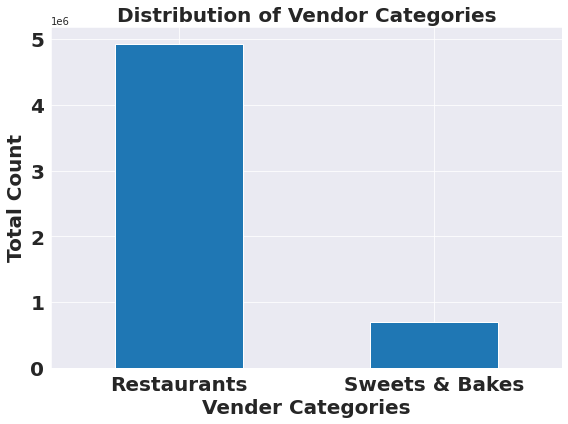

In [ ]:
plt.subplots(figsize=(8,6))
cleaned_train['vendor_category_en'].value_counts().head(20).plot.bar()
plt.xlabel('Vender Categories',fontsize=20, fontweight='bold')
plt.ylabel('Total Count',fontsize=20, fontweight='bold')
plt.title('Distribution of Vendor Categories',fontsize=20, fontweight='bold')
plt.xticks(fontsize = 20, rotation=0, fontweight='bold')
plt.yticks(fontsize = 20, fontweight='bold')
plt.tight_layout()

We see a majority of the vendors were Restaurants.

Is Open

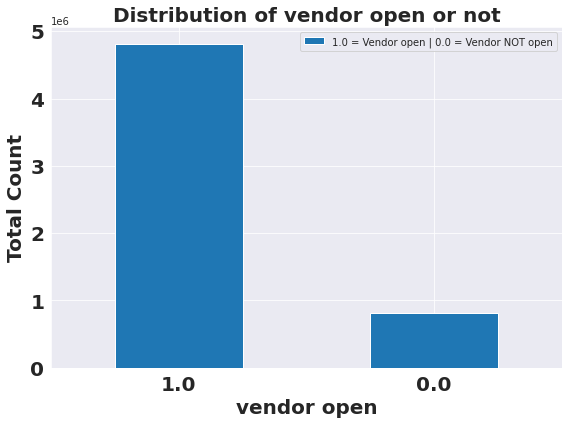

In [ ]:
plt.subplots(figsize=(8,6))
cleaned_train['is_open'].value_counts().head(20).plot.bar()
plt.xlabel('vendor open',fontsize=20, fontweight='bold')
plt.ylabel('Total Count',fontsize=20, fontweight='bold')
plt.title('Distribution of vendor open or not',fontsize=20, fontweight='bold')
plt.xticks(fontsize = 20, rotation=0, fontweight='bold')
plt.yticks(fontsize = 20, fontweight='bold')
plt.legend(["1.0 = Vendor open | 0.0 = Vendor NOT open"])
plt.tight_layout()

Majority of the vendors listed on Akeed were open, but there were some that were closed. Should we drop these records that show vendors closed?

Vendor Account Verified

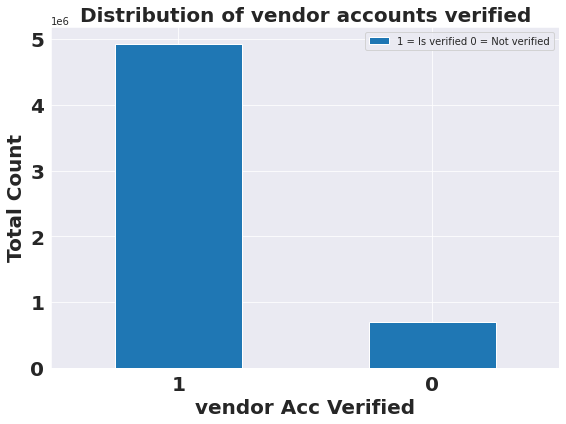

In [ ]:
plt.subplots(figsize=(8,6))
cleaned_train['vendor_acc_verified'].value_counts().head(20).plot.bar()
plt.xlabel('vendor Acc Verified',fontsize=20, fontweight='bold')
plt.ylabel('Total Count',fontsize=20, fontweight='bold')
plt.title('Distribution of vendor accounts verified',fontsize=20, fontweight='bold')
plt.xticks(fontsize = 20, rotation=0, fontweight='bold')
plt.yticks(fontsize = 20, fontweight='bold')
plt.legend(["1 = Is verified 0 = Not verified"], loc = "upper right")
plt.tight_layout()

We see that majority of the vendor accounts were verified.

City ID

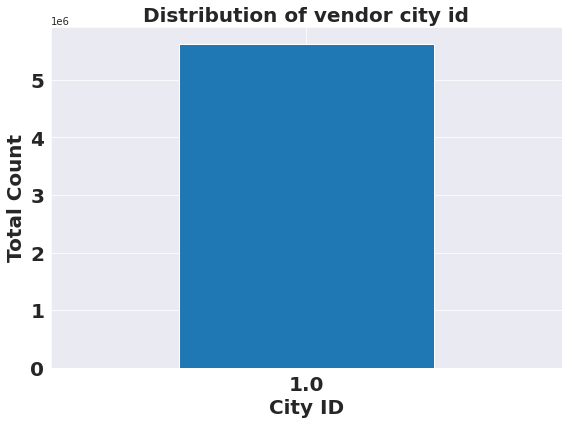

In [ ]:
plt.subplots(figsize=(8,6))
cleaned_train['city_id'].value_counts().head(20).plot.bar()
plt.xlabel('City ID',fontsize=20, fontweight='bold')
plt.ylabel('Total Count',fontsize=20, fontweight='bold')
plt.title('Distribution of vendor city id',fontsize=20, fontweight='bold')
plt.xticks(fontsize = 20, rotation=0, fontweight='bold')
plt.yticks(fontsize = 20, fontweight='bold')
plt.tight_layout()

There was only one city ID.

In [ ]:
# save cleaned file to drive
cleaned_train.to_csv('/content/drive/My Drive/Akeed Datasets/after_univariate_clean.csv', index =False)




THE END!!!